## Life Expectancy and GDP: Introduction

#### David Ngo

In this project, we will analyze GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries. Our goal is to analyze, prepare, and plot data to answer questions in a meaningful way.

We have the following questions:

- How has GDP and expectancy changed overtime across countries?
- Is there a positive or negative correlation between GDP and life expectancy? 

And we will apply the following skills:

- Data Acquisition
- Data Manipulation with Pandas
- Data Visualization with Matplotlib and Seaborn
- Data Wrangling and Tidying
- Hypothesis Testing
- Summarizing Quantitative Data


## Import Python Modules

We will first import the following modules for this project:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

## Preparing the Data

Let us load the data file "all_data.csv" into a dataframe. We can also view the beginning of the dataframe.

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


We find the dataset does not contain missing values that we might worry about.

We should check whether the dataset contains missing values.

In [3]:
df.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

## Data Exploration

The column "Life expectancy at birth (years)" can be cumbersome to use in our code. For convenience, we will rename the column "Life Expectancy" instead.

In [4]:
df.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace = True)
print(df.head())

  Country  Year  Life Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


Notice that GDP values are raised by e10, which may be cumbersome to plot. We should simply the numbers.

In [5]:
df['GDP'] = round(df['GDP']/(10**10), 2)
print(df.head())

  Country  Year  Life Expectancy   GDP
0   Chile  2000             77.3  7.79
1   Chile  2001             77.3  7.10
2   Chile  2002             77.8  6.97
3   Chile  2003             77.9  7.56
4   Chile  2004             78.0  9.92


Now we can talk about GDP in terms of billions (U.S. dollars).

Next, Let us identify the six countries we are studying.

In [6]:
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


We have the data from the following six countries:
- Chile
- China
- Germany
- Mexico
- United State of America
- Zimambwe

The country "United States of America" can also be cumbersome when coding. Let us rename it as "USA" instead.

In [7]:
df['Country'] = df['Country'].replace(['United States of America'], 'USA')
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


Let us view the different years in which data was collected. 

In [8]:
print(df['Year'].unique())
print(df['Year'].min(),df['Year'].max())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
2000 2015


We find that the data ranges continuously from the year 2000 to 2015.

## Data Visualization

Let us begin exploring the data. We can create a line plot to examine the trends of GDP for each country overtime.

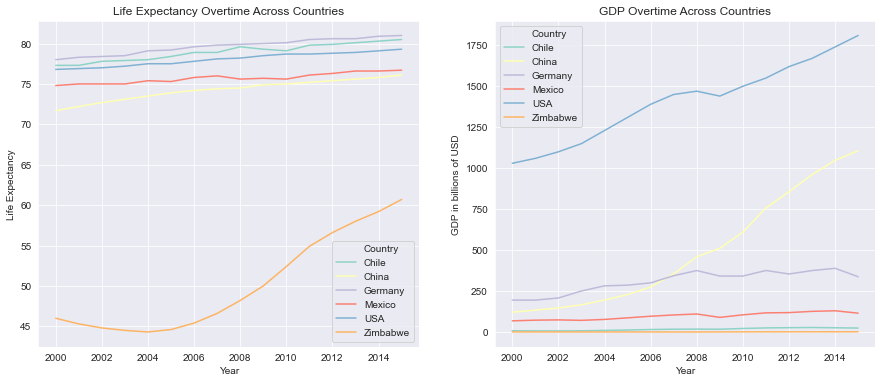

In [9]:
plt.figure(figsize=(15, 6))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.set_palette('Set3')
sns.lineplot(data=df, x='Year', y='Life Expectancy', hue='Country')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Overtime Across Countries')

plt.subplot(1,2,2)
sns.set_palette('Set3')
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.ylabel('GDP in billions of USD')
plt.title('GDP Overtime Across Countries')

plt.subplots_adjust(wspace=0.20)
plt.show()

We find that life expectancy among every country, with the exception of Zimbabwe, have similar levels and positive trends of life expectancy. Though Zimbabwe has comparatively low levels of life expectancy, the country also has has the greatest positive growth from the years 2006 onwards.

We also find that the USA has the greatest levels of GDP across the 2000 to 2015 period, the USA and China appear to have an overall positive trend in GDP growth by 2015, with China appearing to have the greatest positive growth in GDP from 2008 onwards. Comparatively, Chile, Germany, Mexico, and Zimbabwe seem to display more stagnant trends in GDP across years. Chile and Zimambwe also have the lowest levels of GDP among the listed countries.

To both examine and explore the data, we can plot the data to make more concise comparisons between countries and our variables of interest. We begin by comparing the average life expectancy and GDP across countries.

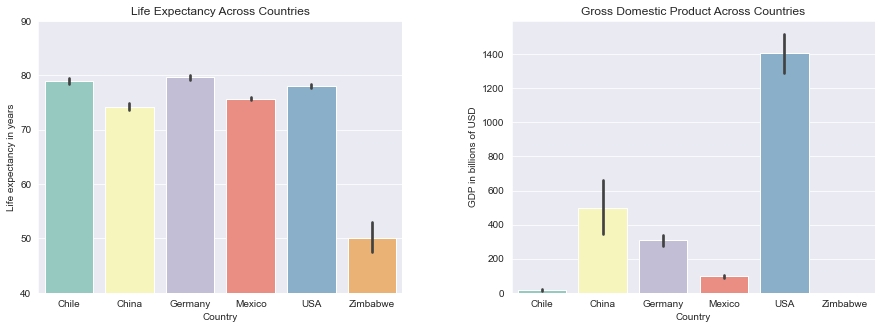

In [10]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.set_palette('Set3')
sns.barplot(data=df,x='Country', y = 'Life Expectancy')
plt.ylim(40,90)
plt.title('Life Expectancy Across Countries')
plt.ylabel('Life expectancy in years')

plt.subplot(1,2,2)
sns.set_palette('Set3')
sns.barplot(data=df,x='Country', y='GDP')
plt.title('Gross Domestic Product Across Countries')
plt.ylabel('GDP in billions of USD')

plt.subplots_adjust(wspace=0.3)
plt.show()

From the figures above, we can reconfirm that every country with the exception of Zimbabwe have relatively similar rates of average life expectancy. However, each country has varying levels of GDP. Later, we may want to compare life expectancy with GDP levels to examine whether one affects the other. Note that the GDP graph may be distorted and difficult to interpret due to Chile and Zimbabwe having much lower GDP values compared to the USA.

Let us create boxplots to examine the distribution of average life expectancy and GDP across countries. 

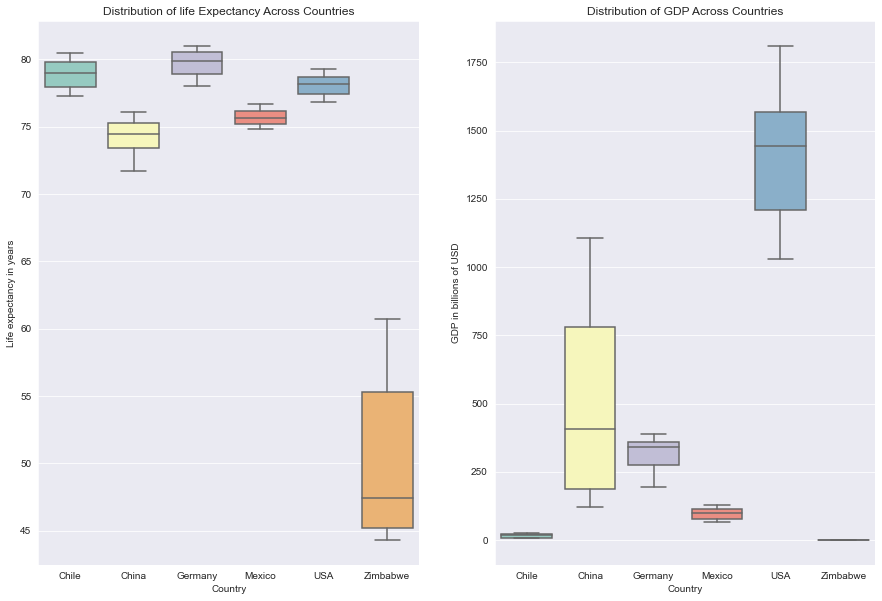

In [11]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.boxplot(data=df,x='Country',y='Life Expectancy')
plt.title('Distribution of life Expectancy Across Countries')
plt.ylabel('Life expectancy in years')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='Country',y='GDP')
plt.title('Distribution of GDP Across Countries')
plt.ylabel('GDP in billions of USD')

plt.show()

From the above figures, it is much easier to visually infer that every country apart from Zimbabwe are in a similar life expectancy range, expecially when accounting for their distribution. In contrast, Zimbabwe's has a much larger life expectancy spread or distribution. We also find  that Chile and Zimbabwe have the lowest levels and distribution of GDP in comparison to other countries. 

It is interesting to note that while Chile and Zimbabwe have similar levels of low GDP, Chile maintains a distribution of life expectancy similar to the USA (which has the highest levels of GDP) that is much higher than Zimbabwe

Since the boxplot for comparing the distribution of life expectancy across countries may be difficult to interpret, we can try using a violin plot instead.

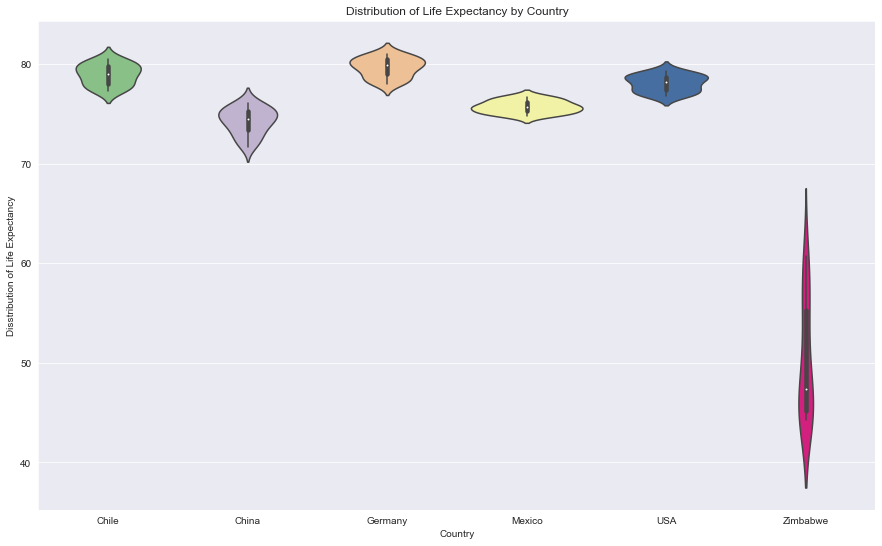

In [12]:

plt.figure(figsize=(15, 9))
sns.set_style('darkgrid')
sns.set_palette('Accent')
sns.violinplot(data=df, x='Country', y='Life Expectancy')
plt.ylabel('Disstribution of Life Expectancy')
plt.title('Distribution of Life Expectancy by Country')
plt.show()

The above violin plot appears to improve on our visualization of life expectancy distribution and reconfirm our earlier observations. A violin plot for GDP distribution did not improve on the previous boxplot, so it is not necessary to plot it.

Let us make take a closer look at the differences between Chile and Zimbabwe by plotting their average life expectancy and GDP across time.

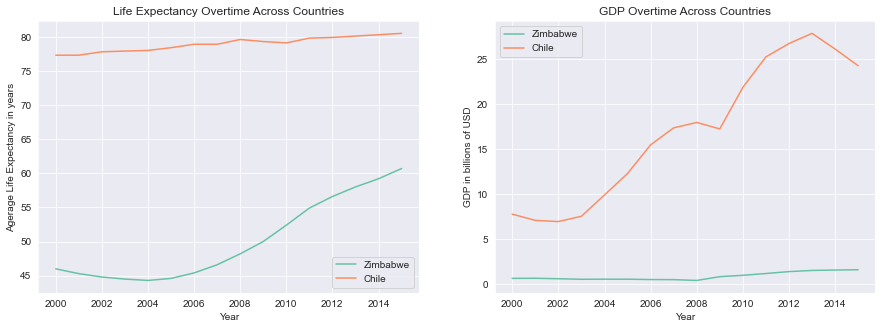

In [13]:
sns.set_palette('Set2')
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))

zimbabwe = df[df['Country'] == 'Zimbabwe']
chile = df[df['Country'] == 'Chile']

plt.subplot(1,2,1)
plt.plot(zimbabwe['Year'].values, zimbabwe['Life Expectancy'].values, label='Zimbabwe')
plt.plot(chile['Year'].values, chile['Life Expectancy'].values, label='Chile')

plt.title('Life Expectancy Overtime Across Countries')
plt.xticks(range(2000, 2016, 2))
plt.xlabel('Year')
plt.ylabel('Agerage Life Expectancy in years')
plt.legend()

plt.subplot(1,2,2)
plt.plot(zimbabwe['Year'].values, zimbabwe['GDP'].values,label='Zimbabwe')
plt.plot(chile['Year'].values, chile['GDP'].values,label='Chile')
plt.xticks(range(2000, 2015, 2))
plt.title('GDP Overtime Across Countries')
plt.xlabel('Year')
plt.ylabel('GDP in billions of USD')
plt.legend()

plt.show()

From the figures above we can more clearly compare Zimbabwe and Chile. Chile maintained a high average life expectancy, while Zimbabwe's average life expectancy remained comparatively much lower. However, Chile saw little gains in GDP across the 15 years compared to Zimbabwe which had experienced higher magnitudes of GDP by 2015. Note that both Zimbabwe's life expectancy and GDP appears to be positively increasing from the years 2008 onwards. We may want to measure whether there is a positive correlation between life expectancy and GDP.

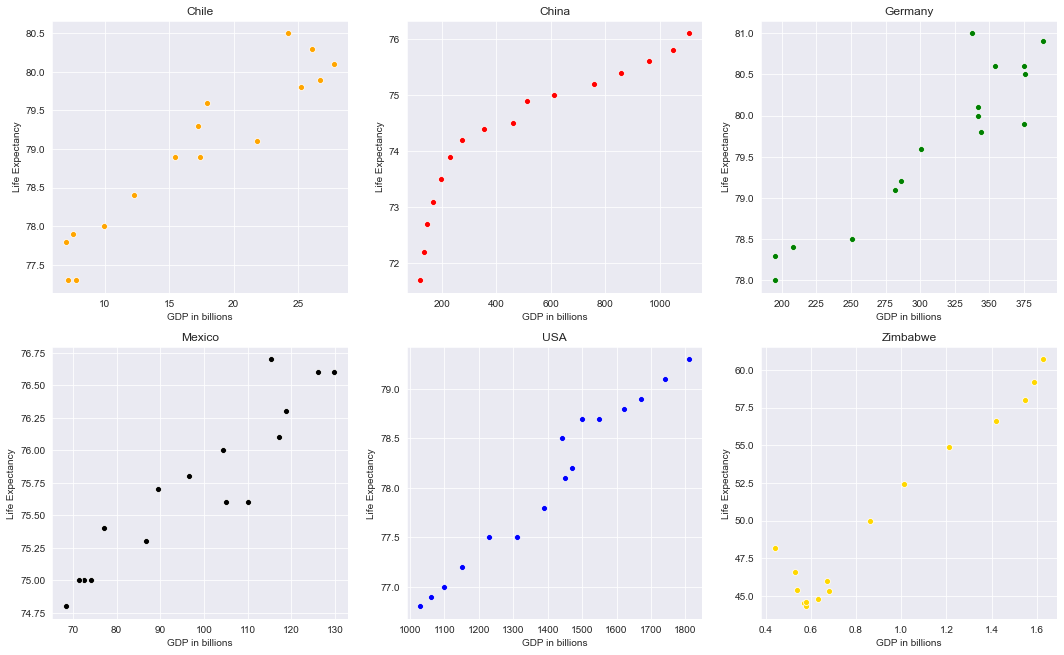

In [14]:
plt.figure(figsize=(18,11))
sns.set_style('darkgrid')

countries = df['Country'].unique()
colors = ['orange','red','green','black','blue','gold']

for i in range(len(countries)):
    country_df = df[df['Country'] == countries[i]]
    plt.subplot(2,3,i+1)
    sns.scatterplot(data=country_df, x='GDP',y='Life Expectancy',color=colors[i])
    plt.ylabel('Life Expectancy')
    plt.xlabel('GDP in billions')
    plt.title(countries[i])
    
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

From the above scatterplots, we can infer that GSP and life expectancy are positively correlated across every country. 

## Data Analysis

Based on earlier observations, we may want to confirm whether life expectancy is dependent on GDP. Let us do this through hypothesis testing.

In [15]:
for i in df['Country'].unique():
    cntry = df[df.Country == i]
    tstatistic, pval = ttest_ind(cntry['Life Expectancy'], cntry.GDP)
    print('The p-value of ' + i + ' is {}'.format(pval))

The p-value of Chile is 1.010150105908431e-24
The p-value of China is 3.91822676758091e-05
The p-value of Germany is 1.6633310706925215e-14
The p-value of Mexico is 0.00022795158579503433
The p-value of USA is 5.535351459244189e-20
The p-value of Zimbabwe is 3.76869625567363e-25


We can state the following null hypothesis: at least one country demonstrates no significant correlation between life expectancy and GDP. We find that the p-value for each country is lower than .01, therefore there we can reject the null hypothesis at the $99\%$ significance level. In other words, we find that an increase in GDP corresponds with an increase in life expectancy; we do not have enough data to determine causality between the two variables.

## Conclusion

to conclude, we created several visualations to explore the life expectancy and GDP differences from the years 2000 to 2015 between the countries Chile, China, Germany, Mexico, USA, and Zimambwe. 

In most countries, GDP levels have risen by 2015, with China displaying the most growth in GDP. While the USA and China had the highest levels of GDP by 2015, Chile and Zimbabwe demonstrated the lowest levels of GDP across the entire timespan. 

All countries apart from Zimbabwe appeared to have a distribution of life expectancy clustered around the 70 to 80 years range, with small positive changes in life expectancy overtime. Though Zimbabwe had the lowest levels of life expectancy, the country also demonstrated the greatest increases in life expectancy overtime. 

We confirm that there is a correlation between increases in life expectancy and increases in GDP. From this, we can predict that as Zimbabwe increases their GDP, life expectancy will also increase. 

However, we should also acknowledge that though Chile has low levels of GDP, the country's life expectancy is the second highest among the given countries, slightly below the USA. There may be other prevalent factors in Chile that increase life expectancy—diet, environment, healthcare, etc. 

In the future, we may want to include additional coutnries and additional variables to more accurately and robustly compare the relatonship between life expectancy and GDP.







